In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.

Wrapper Methods examine all or almost all possibilities of feature combinations to identify the optimal feature set. Because of this, they are known as “greedy” algorithms.

The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For **regression evaluation criterion can be p-values, R-squared, Adjusted R-squared**, similarly for **classification the evaluation criterion can be accuracy, precision, recall, f1-score**, etc. Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm.

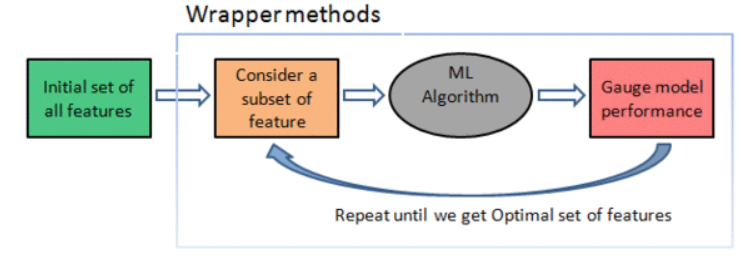

In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_wine

In [2]:
data = load_wine()

In [3]:
x = pd.DataFrame(data.data)
x.columns = data.feature_names

y = pd.Series(data.target)

## Step Forward Selection

Steps for Step Forward Selection:


1.   Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
2.   Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.
3.   Fit all possible models with one extra feature added to the previously selected feature(s).
4.   Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.

In [4]:
sfs = SFS(estimator = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
          k_features = (1,13),
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1).fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    9.8s finished

[2021-02-01 10:16:29] Features: 1/13 -- score: 0.7082070707070707[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s finished

[2021-02-01 10:16:35] Features: 2/13 -- score: 0.8940656565656565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.4s finished

[2021-02-01 10:16:42] Features: 3/13 -- score: 0.9664141414141414[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished

[2021-02-01 10:16:48] Features: 4/13 -- score: 0.97

In [5]:
sfs_score = sfs.k_score_
sfs_features = sfs.k_feature_names_
print("Accuracy: " + str(sfs_score))
print("Features considered : " + str(sfs_features))

Accuracy: 0.9888888888888889
Features considered : ('alcohol', 'malic_acid', 'ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline')


## Step Backward Selection

Steps for Step Backward Selection:


1.   Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
2.   Fit a full model including all the features.
3.   Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.
4.   Remove the feature which is under consideration.
5.   Fit a model without this feature. Repeat the entire process from Step 3.

In [6]:
sbs = SFS(estimator = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
          k_features = (1,13),
          forward = False,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1).fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.6s finished

[2021-02-01 10:17:26] Features: 12/1 -- score: 0.9722222222222222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.4s finished

[2021-02-01 10:17:32] Features: 11/1 -- score: 0.9776515151515152[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.2s finished

[2021-02-01 10:17:39] Features: 10/1 -- score: 0.9833333333333334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished

[2021-02-01 10:17:45] Features: 9/1 -- score: 0.983

In [7]:
sbs_score = sbs.k_score_
sbs_features = sbs.k_feature_names_
print("Accuracy: " + str(sbs_score))
print("Features considered : " + str(sbs_features))

Accuracy: 0.9888888888888889
Features considered : ('alcohol', 'malic_acid', 'ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline')


## Recursive Feature Elimination

It select features by recursively considering smaller and smaller sets of features.
First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [9]:
def RecursiveFeatureElimination(estimator, x_train, y_train, x_test, y_test, features):
    for index in range(1,features):
        sel = RFE(estimator = estimator,
                 n_features_to_select = index)
        sel.fit(x_train, y_train)
        print('Number of features selected : ', index)
        print('Selected features : ', list(x_train.columns[sel.get_support()]))
        print('Accuracy : ', sel.score(x_test, y_test))
        print('')

In [10]:
RecursiveFeatureElimination(RandomForestClassifier(n_estimators=100, random_state=0),
                           x_train, y_train, x_test, y_test, 13)

Number of features selected :  1
Selected features :  ['flavanoids']
Accuracy :  0.6851851851851852

Number of features selected :  2
Selected features :  ['flavanoids', 'color_intensity']
Accuracy :  0.8888888888888888

Number of features selected :  3
Selected features :  ['flavanoids', 'color_intensity', 'proline']
Accuracy :  0.9814814814814815

Number of features selected :  4
Selected features :  ['flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9814814814814815

Number of features selected :  5
Selected features :  ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9814814814814815

Number of features selected :  6
Selected features :  ['alcohol', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9629629629629629

Number of features selected :  7
Selected features :  ['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'hue', 'od280/

In [11]:
RecursiveFeatureElimination(GradientBoostingClassifier(n_estimators=100, random_state=0),
                           x_train, y_train, x_test, y_test, 13)

Number of features selected :  1
Selected features :  ['color_intensity']
Accuracy :  0.7037037037037037

Number of features selected :  2
Selected features :  ['color_intensity', 'od280/od315_of_diluted_wines']
Accuracy :  0.8518518518518519

Number of features selected :  3
Selected features :  ['color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9444444444444444

Number of features selected :  4
Selected features :  ['flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9629629629629629

Number of features selected :  5
Selected features :  ['malic_acid', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9814814814814815

Number of features selected :  6
Selected features :  ['malic_acid', 'magnesium', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Accuracy :  0.9629629629629629

Number of features selected :  7
Selected features :  ['malic_acid', 'ash', '